# Speech Emotion Recognition

# Importing the required libraries

In [52]:
#python
import os

#package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import IPython.display as ipd
import librosa.display
import scipy.io.wavfile

#keras
from keras.utils import np_utils

#sklearn
from sklearn.preprocessing import LabelEncoder

from scipy import signal
from tqdm import tqdm_notebook as tqdm

# Importing dataset 

In [53]:
#Data directory
dir_list=os.listdir('E:/SER/audio/')
dir_list.sort()
print(dir_list)

['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05', 'Actor_06', 'Actor_07', 'Actor_08', 'Actor_09', 'Actor_10', 'Actor_11', 'Actor_12', 'Actor_13', 'Actor_14', 'Actor_15', 'Actor_16', 'Actor_17', 'Actor_18', 'Actor_19', 'Actor_20', 'Actor_21', 'Actor_22', 'Actor_23', 'Actor_24']


# Pre-processing

In [54]:
#create Dataframe
ravdess_db=pd.DataFrame(columns=['path','source','actor','gender','emotion','emotion_lb'])
count=0
for i in dir_list:
    file_list=os.listdir('E:/SER/audio/'+i)
    for f in file_list:
        nm=f.split('.')[0].split('-')
        path='E:/SER/audio/'+i+'/'+f
        actor=int(nm[-1])
        emotion=int(nm[2])
        source="Ravdess"
            
        if int(actor)%2==0:
            gender="female"
        else:
            gender="male"
            
        if nm[3]=='01':
            intensity=0
        else:
            intensity=1
            
        if nm[4]=='01':
            statement=0
        else:
            statement=1
            
        if nm[5]=='01':
            repeat=0
        else:
            repeat=1
            
        if emotion==1:
            lb="neutral"
        elif emotion==2:
            lb="calm"
        elif emotion==3:
            lb="happy"
        elif emotion==4:
            lb="sad"
        elif emotion==5:
            lb="angry"
        elif emotion==6:
            lb="fearful"
        elif emotion==7:
            lb="disgust"
        elif emotion==8:
            lb="surprised"
        else:
            lb="none"
            
        ravdess_db.loc[count]=[path,source,actor,gender,emotion,lb]
        count+=1

In [55]:
print(len(ravdess_db))

1440


In [56]:
ravdess_db.sort_values(by='path',inplace=True)
ravdess_db.index=range(len(ravdess_db.index))
ravdess_db.head()

path   source actor gender  \
0  E:/SER/audio/Actor_01/03-01-01-01-01-01-01.wav  Ravdess     1   male   
1  E:/SER/audio/Actor_01/03-01-01-01-01-02-01.wav  Ravdess     1   male   
2  E:/SER/audio/Actor_01/03-01-01-01-02-01-01.wav  Ravdess     1   male   
3  E:/SER/audio/Actor_01/03-01-01-01-02-02-01.wav  Ravdess     1   male   
4  E:/SER/audio/Actor_01/03-01-02-01-01-01-01.wav  Ravdess     1   male   

  emotion emotion_lb  
0       1    neutral  
1       1    neutral  
2       1    neutral  
3       1    neutral  
4       2       calm

In [57]:
ravdess_db.to_csv('C:/Users/ayush/Speech Emotion/csv/list.csv')

In [58]:
ravdess_db['split']=np.where((ravdess_db.actor==23) | (ravdess_db.actor==24), 'Test',
                              (np.where((ravdess_db.actor==21) | (ravdess_db.actor==22),'Val', 'Train')))

In [59]:
ravdess_db['split'].value_counts()

Train    1200
Test      120
Val       120
Name: split, dtype: int64

In [60]:
ravdess_db.shape

(1440, 7)

In [61]:
ravdess_db.emotion_lb.value_counts()

calm         192
fearful      192
surprised    192
sad          192
happy        192
disgust      192
angry        192
neutral       96
Name: emotion_lb, dtype: int64

### Changing Calm to Neutral

In [62]:
ravdess_db.loc[ravdess_db.emotion_lb=='calm',['emotion','emotion_lb']]=1,'neutral'

In [63]:
ravdess_db.emotion_lb.value_counts()

neutral      288
fearful      192
surprised    192
sad          192
happy        192
disgust      192
angry        192
Name: emotion_lb, dtype: int64

In [64]:
dataset_db=ravdess_db

In [65]:
dataset_db.emotion_lb=dataset_db.gender+"_"+dataset_db.emotion_lb

In [66]:
dataset_db.to_csv('C:/Users/ayush/Speech Emotion/csv/list2.csv')

In [67]:
dataset_db.head()

path   source actor gender  \
0  E:/SER/audio/Actor_01/03-01-01-01-01-01-01.wav  Ravdess     1   male   
1  E:/SER/audio/Actor_01/03-01-01-01-01-02-01.wav  Ravdess     1   male   
2  E:/SER/audio/Actor_01/03-01-01-01-02-01-01.wav  Ravdess     1   male   
3  E:/SER/audio/Actor_01/03-01-01-01-02-02-01.wav  Ravdess     1   male   
4  E:/SER/audio/Actor_01/03-01-02-01-01-01-01.wav  Ravdess     1   male   

  emotion    emotion_lb  split  
0       1  male_neutral  Train  
1       1  male_neutral  Train  
2       1  male_neutral  Train  
3       1  male_neutral  Train  
4       1  male_neutral  Train

In [68]:
dataset_db.emotion_lb.value_counts()

female_neutral      144
male_neutral        144
female_fearful       96
male_angry           96
male_fearful         96
male_surprised       96
female_surprised     96
male_sad             96
male_happy           96
female_happy         96
female_angry         96
female_disgust       96
male_disgust         96
female_sad           96
Name: emotion_lb, dtype: int64

# Plotting the audio file's waveform

In [69]:
sampling_rate = 44100

In [70]:
filename = ravdess_db.path[0]
print (filename)

E:/SER/audio/Actor_01/03-01-01-01-01-01-01.wav


In [71]:
samples, sample_rate = librosa.load(filename, res_type='kaiser_fast',sr=sampling_rate)
sample_rate, samples.shape

(44100, (145676,))

In [72]:
ipd.Audio(samples,rate=sample_rate)

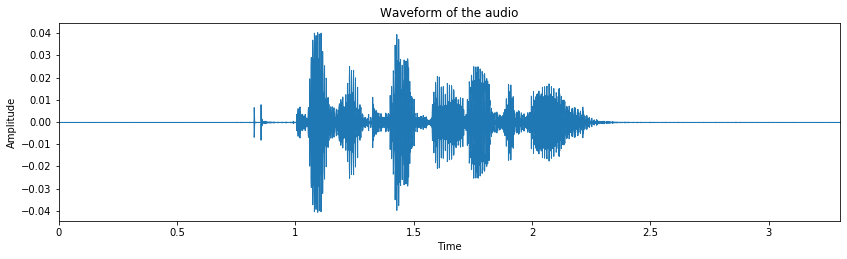

In [73]:
# Plotting Wave Form
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Waveform of the audio')
ax1.set_ylabel('Amplitude')
librosa.display.waveplot(samples, sr=sample_rate)

### Trim the Audio


In [74]:
samples_trim, index = librosa.effects.trim(samples,top_db=25)
samples_trim.shape, index

((55296,), array([44032, 99328]))

In [75]:
ipd.Audio(samples_trim,rate=sample_rate)

In [76]:
Difference_in_length = len(samples)-len(samples_trim)
Difference_in_length

90380

In [77]:
Difference_in_duration = librosa.get_duration(samples)-librosa.get_duration(samples_trim)
Difference_in_duration

4.098866213151927

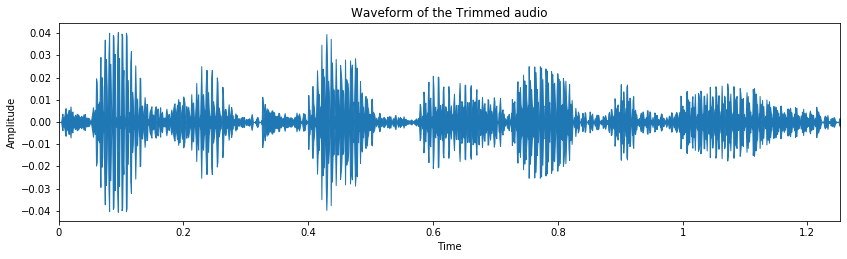

In [78]:
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Waveform of the Trimmed audio')
ax1.set_ylabel('Amplitude')
librosa.display.waveplot(samples_trim, sr=sample_rate)

#### Wiener Filter to remove Noise



In [79]:
sample_weiner = scipy.signal.wiener(samples_trim)
len(sample_weiner)

55296

In [80]:
ipd.Audio(sample_weiner,rate=sample_rate)

In [81]:
Diff_noise = sample_weiner-samples_trim
ipd.Audio(Diff_noise,rate=sample_rate)

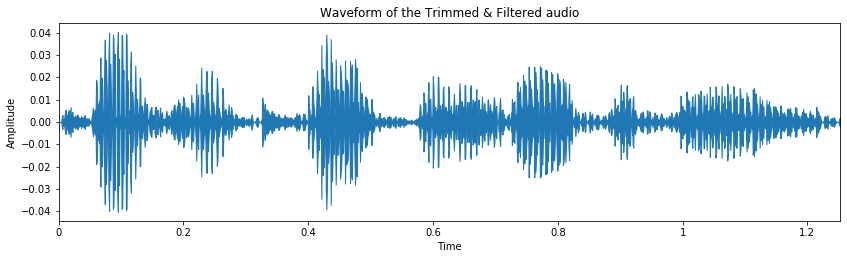

In [82]:
# Plotting Wave Form 
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Waveform of the Trimmed & Filtered audio')
ax1.set_ylabel('Amplitude')
librosa.display.waveplot(sample_weiner, sr=sample_rate)

#### Waveform of the noise in the audio

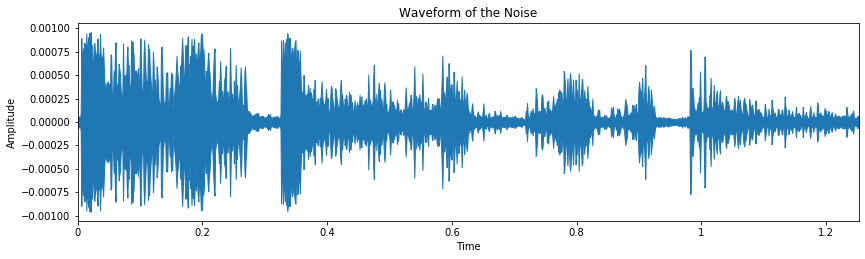

In [83]:
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Waveform of the Noise')
ax1.set_ylabel('Amplitude')
librosa.display.waveplot(Diff_noise, sr=sample_rate)

In [84]:
dataset_db.index = range(len(dataset_db.index))

In [85]:
dataset_db.shape

(1440, 7)

# Feature Extraction

In [86]:
audio_duration=3
sampling_rate=44100
input_length=sampling_rate * audio_duration
n_mfcc = 20

In [87]:
data_sample = np.zeros(input_length)
MFCC = librosa.feature.mfcc(data_sample, sr=sampling_rate, n_mfcc=n_mfcc)

In [88]:
MFCC.shape

(20, 259)

In [89]:
dataset_db.split.value_counts()

Train    1200
Test      120
Val       120
Name: split, dtype: int64

In [101]:

signal, sample_rate = librosa.load(dataset_db.path[0], res_type='kaiser_fast',sr=44100)
signal,index = librosa.effects.trim(signal,top_db = 25)
signal = scipy.signal.wiener(signal)
print(signal.shape)
if len(signal) > input_length:
    signal = signal[0:input_length]
elif  input_length > len(signal):
    max_offset = input_length - len(signal)  
    signal = np.pad(signal, (0, max_offset), "constant")
    


(55296,)


In [102]:
signal = np.array(signal).reshape(-1,1)

In [103]:
signal.shape

(132300, 1)

In [113]:
audios= np.empty(shape=(dataset_db.shape[0],128, MFCC.shape[1]))

def mel_spectrogram(signal, sr=16000, n_fft=512, win_length=256, hop_length=128, window='hamming', n_mels=128, fmax=4000):
    
    # Compute spectogram
    mel_spect = np.abs(librosa.stft(signal, n_fft=n_fft, window=window, win_length=win_length, hop_length=hop_length)) ** 2
    
    # Compute mel spectrogram
    mel_spect = librosa.feature.melspectrogram(S=mel_spect, sr=sr, n_mels=n_mels, fmax=fmax)
    
    # Compute log-mel spectrogram
    mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
    logspec = np.expand_dims(mel_spect, axis=-1)
    audios[count,] = logspec 
    
    return mel_spect

In [114]:
audios.shape

(1440, 128, 259)

In [115]:
import h5py
with h5py.File('Ravdess_audio_Mel_spec.h5', 'w') as hf:
    hf.create_dataset("Ravdess_audio_Mel_spec",  data=audios)

In [116]:
import h5py
with h5py.File('Ravdess_audio_Mel_spec.h5', 'r') as hf:
  audios = hf['Ravdess_audio_Mel_spec'][:]

### Plotting Mel Power Spectrogram

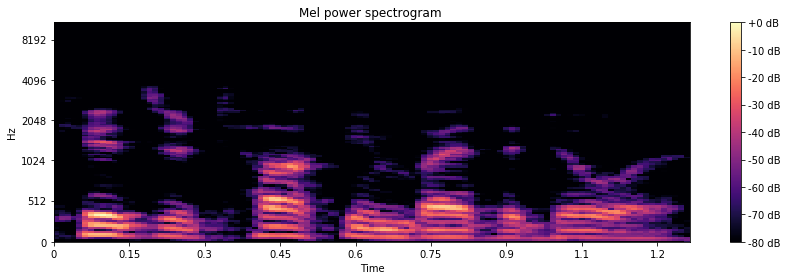

In [117]:
S_sample = librosa.feature.melspectrogram(sample_weiner, sr=sample_rate, n_mels=128,n_fft=2048,hop_length=512)

log_S_sample = librosa.amplitude_to_db(S_sample, ref=np.max)

plt.figure(figsize=(12, 4))
librosa.display.specshow(log_S_sample, sr=sample_rate, x_axis='time', y_axis='mel')
plt.title('Mel power spectrogram ')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

# Dividing The data into train and test

In [118]:
x_train=audios[(dataset_db['split']=='Train')]
y_train=dataset_db.emotion_lb[(dataset_db['split']=='Train')]

print(x_train.shape,y_train.shape)

(1200, 128, 259) (1200,)


In [48]:
x_test=audios[(dataset_db['split']=='Val')]
y_test=dataset_db.emotion_lb[(dataset_db['split']=='Val')]

print(x_test.shape,y_test.shape)

(120, 128, 259) (120,)


In [49]:
x_train=np.array(x_train)
y_train=np.array(y_train)
x_test=np.array(x_test)
y_test=np.array(y_test)

In [50]:
win_ts = 128
hop_ts = 64

# Split spectrogram into frames
def frame(x, win_step=128, win_size=64):
    nb_frames = 1 + int((x.shape[2] - win_size) / win_step)
    frames = np.zeros((x.shape[0], nb_frames, x.shape[1], win_size)).astype(np.float32)
    for t in range(nb_frames):
        frames[:,t,:,:] = np.copy(x[:,:,(t * win_step):(t * win_step + win_size)],1).astype(np.float32)
    return frames

x_train = frame(x_train, hop_ts, win_ts)
x_test= frame(x_test, hop_ts, win_ts)

In [51]:
lb=LabelEncoder()
y_train=np_utils.to_categorical(lb.fit_transform(y_train))
y_test=np_utils.to_categorical(lb.fit_transform(y_test))

In [52]:
x_traincnn=x_train
x_testcnn=x_test

In [53]:
x_traincnn.shape,x_testcnn.shape,y_train.shape,y_test.shape

((1200, 3, 128, 128), (120, 3, 128, 128), (1200, 14), (120, 14))

# Building the model

In [54]:
from keras.models import Sequential
from keras.layers import Conv1D,Conv2D
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.layers import MaxPooling1D,MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Dense

In [55]:
num_classes=len(np.unique(np.argmax(y_train,1)))
input_shape=x_traincnn.shape[1:]
learning_rate=0.0001
decay = 1e-6
momentum=0.9

In [56]:
input_shape

(3, 128, 128)

In [57]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1] , x_train.shape[2], x_train.shape[3], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1] , x_test.shape[2], x_test.shape[3], 1)
x_train.shape[1:]

(3, 128, 128, 1)

In [58]:
from keras.models import Sequential
from keras.layers import Conv1D,Conv2D
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.layers import MaxPooling1D,MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Dense,Input,TimeDistributed

In [59]:
from keras import backend as K
from keras.models import Sequential, Model
from keras.layers import LSTM,Input
K.clear_session()
input_y = Input(shape=x_train.shape[1:], name='Input_MELSPECT')

## First LFLB (local feature learning block)
y = TimeDistributed(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same'), name='Conv_1_MELSPECT')(input_y)
y = TimeDistributed(BatchNormalization(), name='BatchNorm_1_MELSPECT')(y)
y = TimeDistributed(Activation('elu'), name='Activ_1_MELSPECT')(y)
y = TimeDistributed(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'), name='MaxPool_1_MELSPECT')(y)
y = TimeDistributed(Dropout(0.2), name='Drop_1_MELSPECT')(y)     

## Second LFLB (local feature learning block)
y = TimeDistributed(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same'), name='Conv_2_MELSPECT')(y)
y = TimeDistributed(BatchNormalization(), name='BatchNorm_2_MELSPECT')(y)
y = TimeDistributed(Activation('elu'), name='Activ_2_MELSPECT')(y)
y = TimeDistributed(MaxPooling2D(pool_size=(4, 4), strides=(4, 4), padding='same'), name='MaxPool_2_MELSPECT')(y)
y = TimeDistributed(Dropout(0.2), name='Drop_2_MELSPECT')(y)

## Second LFLB (local feature learning block)
y = TimeDistributed(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='same'), name='Conv_3_MELSPECT')(y)
y = TimeDistributed(BatchNormalization(), name='BatchNorm_3_MELSPECT')(y)
y = TimeDistributed(Activation('elu'), name='Activ_3_MELSPECT')(y)
y = TimeDistributed(MaxPooling2D(pool_size=(4, 4), strides=(4, 4), padding='same'), name='MaxPool_3_MELSPECT')(y)
y = TimeDistributed(Dropout(0.2), name='Drop_3_MELSPECT')(y)

## Second LFLB (local feature learning block)
y = TimeDistributed(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='same'), name='Conv_4_MELSPECT')(y)
y = TimeDistributed(BatchNormalization(), name='BatchNorm_4_MELSPECT')(y)
y = TimeDistributed(Activation('elu'), name='Activ_4_MELSPECT')(y)
y = TimeDistributed(MaxPooling2D(pool_size=(4, 4), strides=(4, 4), padding='same'), name='MaxPool_4_MELSPECT')(y)
y = TimeDistributed(Dropout(0.2), name='Drop_4_MELSPECT')(y)  

## Flat
y = TimeDistributed(Flatten(), name='Flat_MELSPECT')(y)                      
                               
# Apply 2 LSTM layer and one FC
y = LSTM(256, return_sequences=False, dropout=0.2, name='LSTM_1')(y)
y = Dense(y_train.shape[1], activation='softmax', name='FC')(y)

# Build final model
model = Model(inputs=input_y, outputs=y)

# Plot model graph
#plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')
#Image(retina=True, filename='model.png')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [60]:
#Model Compilation
from keras import optimizers
opt=optimizers.Adam(lr=0.001,beta_1=0.9,beta_2=0.999,amsgrad=False)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['categorical_accuracy'])

In [61]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_MELSPECT (InputLayer)  (None, 3, 128, 128, 1)    0         
_________________________________________________________________
Conv_1_MELSPECT (TimeDistrib (None, 3, 128, 128, 64)   640       
_________________________________________________________________
BatchNorm_1_MELSPECT (TimeDi (None, 3, 128, 128, 64)   256       
_________________________________________________________________
Activ_1_MELSPECT (TimeDistri (None, 3, 128, 128, 64)   0         
_________________________________________________________________
MaxPool_1_MELSPECT (TimeDist (None, 3, 64, 64, 64)     0         
_________________________________________________________________
Drop_1_MELSPECT (TimeDistrib (None, 3, 64, 64, 64)     0         
_________________________________________________________________
Conv_2_MELSPECT (TimeDistrib (None, 3, 64, 64, 64)     36928     
__________

# Training the model

In [67]:
#Train Config
from keras.callbacks import  History, ReduceLROnPlateau, CSVLogger
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping
#batch_size = 16
#num_epochs = 100

best_model_save = ModelCheckpoint('[CNN-LSTM]Model.hdf5', save_best_only=True, monitor='val_acc', mode='max')

# Early stopping
early_stopping = EarlyStopping(monitor='val_acc', patience=30, verbose=1, mode='max')

# Fit model
history = model.fit(x_train, y_train, batch_size=64, epochs=1, validation_data=(x_test, y_test))

Train on 1200 samples, validate on 120 samples
Epoch 1/1
1200/1200 [==============================] - ETA: 12:01 - loss: 2.6382 - categorical_accuracy: 0.109 - ETA: 10:17 - loss: 2.6608 - categorical_accuracy: 0.093 - ETA: 9:10 - loss: 2.6566 - categorical_accuracy: 0.083 - ETA: 7:42 - loss: 2.6537 - categorical_accuracy: 0.08 - ETA: 6:47 - loss: 2.6430 - categorical_accuracy: 0.08 - ETA: 5:53 - loss: 2.6410 - categorical_accuracy: 0.08 - ETA: 5:18 - loss: 2.6470 - categorical_accuracy: 0.08 - ETA: 4:55 - loss: 2.6514 - categorical_accuracy: 0.08 - ETA: 4:17 - loss: 2.6529 - categorical_accuracy: 0.08 - ETA: 3:45 - loss: 2.6462 - categorical_accuracy: 0.09 - ETA: 3:20 - loss: 2.6484 - categorical_accuracy: 0.09 - ETA: 3:01 - loss: 2.6475 - categorical_accuracy: 0.09 - ETA: 2:32 - loss: 2.6467 - categorical_accuracy: 0.09 - ETA: 2:03 - loss: 2.6472 - categorical_accuracy: 0.09 - ETA: 1:35 - loss: 2.6443 - categorical_accuracy: 0.10 - ETA: 1:08 - loss: 2.6422 - categorical_accuracy: 0.10

In [68]:
max(history.history['val_categorical_accuracy'])

0.1

In [66]:
# Plotting the Train Valid Accuracy Graph

plt.plot(cnnhistory.history['categorical_accuracy'])
plt.plot(cnnhistory.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

NameError: name 'cnnhistory' is not defined

In [ ]:
# Plotting the Train Valid Loss Graph

plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Evaluate the model

In [67]:
#saving the model.json
import json
model_json=model.to_json()
with open("Audio_2DCNN_LogMelModel_4L.json","w") as json_file:
    json_file.write(model_json)

In [68]:
#loading json and creating model
from keras.models import model_from_json
json_file=open("Audio_2DCNN_LogMelModel_4L.json","r") 
loaded_model_json=json_file.read()
json_file.close()
loaded_model=model_from_json(loaded_model_json)

In [69]:
from keras.models import load_model
#Returns a compiled model identical to the previous one
loaded_model.load_weights('Audio_2DCNN_4L.h5')

In [71]:
#evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
score=loaded_model.evaluate(x_test,y_test,verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1],score[1]*100))

acc: 10.00%


In [72]:
x_test_data=audios[(dataset_db['split']=='Test')]
y_test_data=dataset_db.emotion_lb[(dataset_db['split']=='Test')]
print(x_test_data.shape,y_test_data.shape)

(120, 128, 259) (120,)


In [73]:
preds=loaded_model.predict(x_test_data,batch_size=16,verbose=1)
pred1=preds.argmax(axis=1)
abc=pred1.astype(int).flatten()
predictions=(lb.inverse_transform((abc)))

ValueError: Error when checking input: expected Input_MELSPECT to have 5 dimensions, but got array with shape (120, 128, 259)

In [ ]:
pred_df=pd.DataFrame({'predictedvalues':predictions})
pred_df[:10]

In [ ]:
actual_df=pd.DataFrame({'actualvalues':y_test_data})
actual_df[:10]
actual_df.index=range(len(actual_df.index))

In [ ]:
final_df=pd.concat([actual_df,pred_df],axis=1)
final_df.head()

In [ ]:
import seaborn as sns
def print_confusion_matrix(confusion_matrix,class_names,figsize=(9,6),fontsize=14):
    df_cm=pd.DataFrame(confusion_matrix,index=class_names,columns=class_names,)
    fig=plt.figure(figsize=figsize)
    try:
        heatmap=sns.heatmap(df_cm,annot=True,fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
        
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(),rotation=0,ha='right',fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(),rotation=45,ha='right',fontsize=fontsize)
    plt.ylabel('True label')
    plt.ylabel('Predicted label')

In [ ]:
from sklearn.metrics import accuracy_score
y_true=final_df.actualvalues
y_pred=final_df.predictedvalues
accuracy_score(y_true,y_pred)*100

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_true,y_pred,average='macro')*100

In [ ]:
from sklearn.metrics import confusion_matrix
c=confusion_matrix(y_true,y_pred)
c

In [ ]:
class_names=sorted(set(final_df.actualvalues))
print_confusion_matrix(c, class_names)